In [1]:
import sys
sys.path.append('./GedankenNet-mps/GedankenNet')

In [2]:
import scipy.io as sio
import matplotlib.pyplot as plt
import os
import numpy as np

# Data
**Input**: hologram, or observation of amplitudes at different distances from z0.  
**Output**: wave amplitude and phase at z0.  

In [3]:
data = sio.loadmat('GedankenNet-mps/demo_data/stained_tissue/lung_demo_FOV1.mat')
print([k for k in data.keys() if not k.startswith('__')])

['inputData', 'targetData']


In [4]:
datasets = [
    ("Stained lung",      "GedankenNet-mps/demo_data/stained_tissue/lung_demo_FOV1.mat"),
    ("Stained pap",       "GedankenNet-mps/demo_data/stained_tissue/pap_demo_FOV1.mat"),
    ("Unstained kidney (1)",  "GedankenNet-mps/demo_data/unstained_tissue/kidney_demo_FOV1.mat"),
    ("Unstained kidney (2)",  "GedankenNet-mps/demo_data/unstained_tissue/kidney_demo_FOV2.mat"),
]

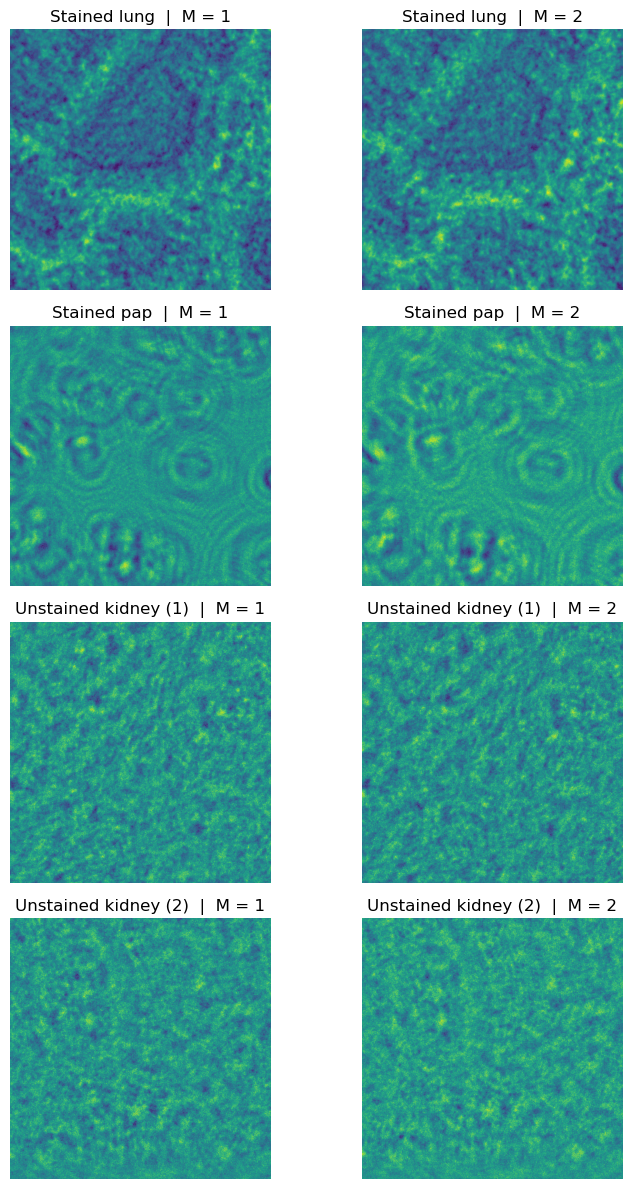

In [5]:
n_rows = len(datasets)
fig, axes = plt.subplots(n_rows, 2, figsize=(8, 3 * n_rows), squeeze=False)

for row, (label, fpath) in enumerate(datasets):
    if not os.path.isfile(fpath):
        raise FileNotFoundError(f"Could not locate: {fpath}")

    mat = sio.loadmat(fpath)
    amp1 = mat["inputData"][:, :, 0]   # M = 1
    amp2 = mat["inputData"][:, :, 1]   # M = 2

    # Left column ─ M = 1
    ax = axes[row, 0]
    im = ax.imshow(amp1, cmap="viridis")
    ax.set_title(f"{label}  |  M = 1")
    ax.axis("off")

    # Right column ─ M = 2
    ax = axes[row, 1]
    im = ax.imshow(amp2, cmap="viridis")
    ax.set_title(f"{label}  |  M = 2")
    ax.axis("off")

plt.tight_layout()
plt.show()

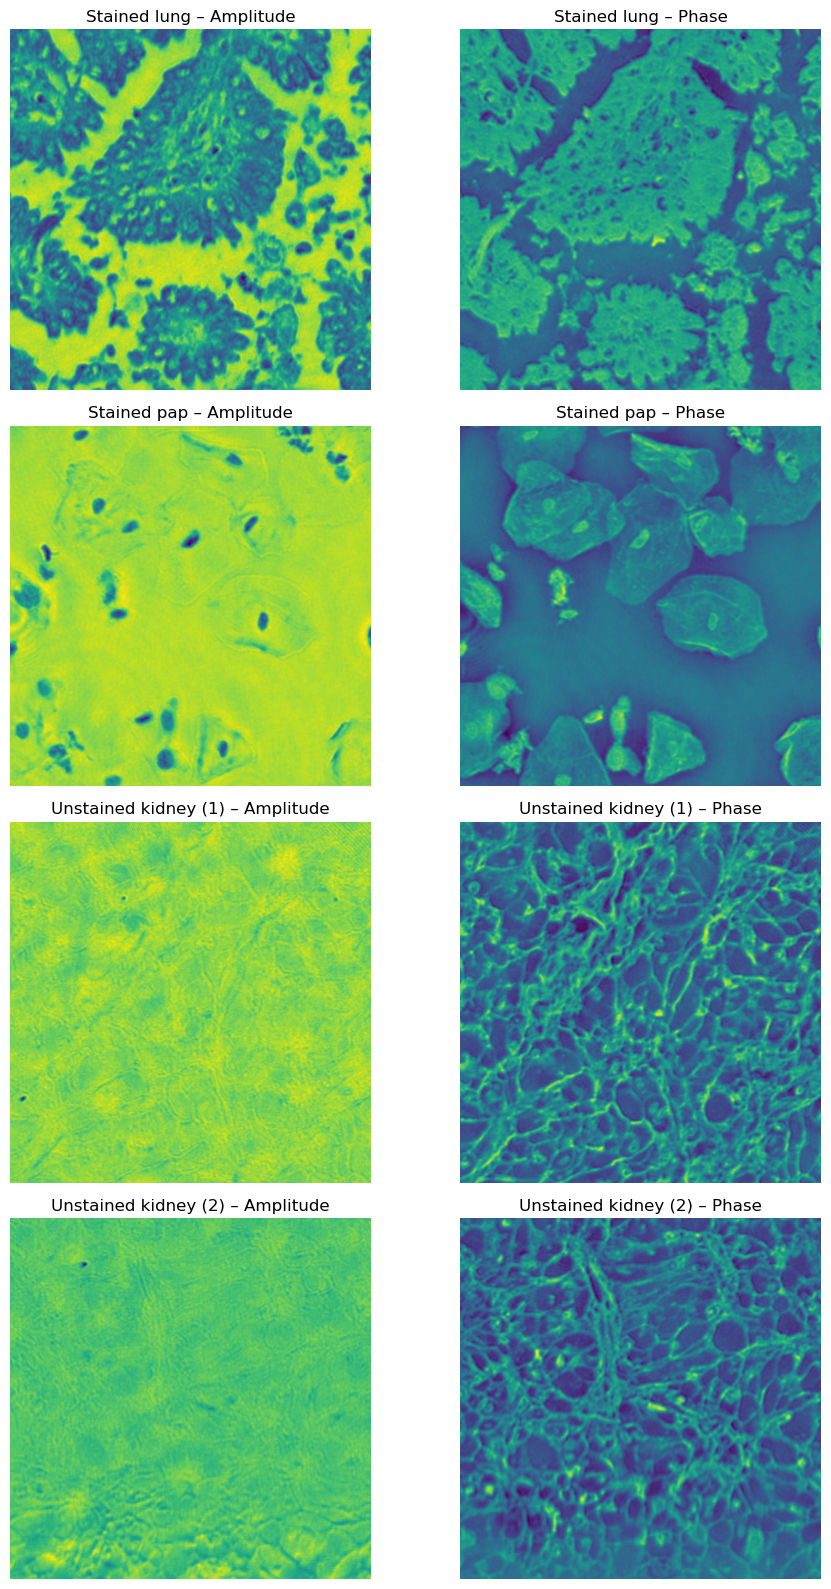

In [6]:
fig, axes = plt.subplots(len(datasets), 2, figsize=(10, 4 * len(datasets)))

for row, (label, path) in enumerate(datasets):
    mat = sio.loadmat(path)

    amp = mat["targetData"][:, :, 0]   # Amplitude at z0
    phase = mat["targetData"][:, :, 1]   # Phase at z0

    # Amplitude
    ax = axes[row, 0]
    ax.imshow(amp)             
    ax.set_title(f"{label} – Amplitude")
    ax.axis("off")

    # Phase
    ax = axes[row, 1]
    ax.imshow(phase)
    ax.set_title(f"{label} – Phase")
    ax.axis("off")

plt.tight_layout()
plt.show()

# Train the model
1. Generate the fake training samples. Each sample consists of a fake image representing amplitude at z0 and another fake image representing the phase.
2. Run GedankenNet training.  

In [ ]:
from generate_random_image_parallel import main
main()

In [ ]:
from my_tools import GedankenDataset

In [1]:
from pathlib import Path
for idx in range(100000):
    filename = Path(f'{idx:04}.png')
    if filename.exists():
        filename.unlink()